In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
%matplotlib inline

In [4]:
def data():
    df = pd.read_csv('train.csv').drop(columns=['Id'])
    return train_test_split(MinMaxScaler().fit_transform(df.iloc[:,1:]).reshape((-1, 28, 28, 1)), to_categorical(df.iloc[:,0], num_classes=5), test_size=0.2, random_state=42)

def model(X_train, Y_train, X_val, Y_val):
    model = Sequential()
    model_choice = {{choice(['one', 'two'])}}
    if model_choice == 'one':
        model.add(Conv2D(16, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))
        model.add(Conv2D(16, kernel_size=3, activation='relu',padding='same'))
        model.add(MaxPooling2D(pool_size=2,strides=2))
        model.add(Dropout({{uniform(0, 1)}}))
        model.add(Conv2D(32, kernel_size=3, activation='relu'))
        model.add(Conv2D(32, kernel_size=3, activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=2,strides=2))
        model.add(Dropout({{uniform(0, 1)}}))
    elif model_choice == 'two':
        model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)))
        model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
        model.add(MaxPooling2D(pool_size=2,strides=2))
        model.add(Dropout({{uniform(0, 1)}}))
        model.add(Conv2D(64, kernel_size=3, activation='relu'))
        model.add(Conv2D(64, kernel_size=3, activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=2,strides=2))
        model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Flatten())
    model.add(Dense({{choice([256, 512,1024])}}, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout({{uniform(0, 1)}}))
    choiceval = {{choice(['one', 'two'])}}
    if choiceval == 'two':
        model.add(Dense({{choice([256, 512,1024])}}, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(5, activation='softmax'))
    
    adam = keras.optimizers.Adam(lr=0.001)
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
    model.fit(X_train, y_train, batch_size=256, nb_epoch=15, verbose=2, validation_data=(X_val, y_val))
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    print('Val accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

def acc_plot(history, name):
    plt.figure(figsize=(10,6))
    plt.plot(history['accuracy'], label='training accuracy')
    plt.plot(history['loss'], label='training loss')    
    plt.plot(history['val_accuracy'], label='validation accuracy')
    plt.plot(history['val_loss'], label='validation loss')
    plt.title(name + ' Accuracy and Loss')
    plt.xlabel('epochs')
    plt.legend()
#     plt.savefig(name +'_Result.png', bbox_inches='tight', dpi=300)
    return plt.show()

def gen_csv(model, name):
    result = dfTest[['Id']].copy()
    result['Label'] = model.predict_classes(MinMaxScaler().fit_transform(dfTest.iloc[:,1:]).reshape((-1, 28, 28, 1)))
    result.to_csv('result' + name + '.csv', encoding='utf-8', index=False)

In [ ]:
X_train, X_val, y_train, y_val = data()
best_run, best_model = optim.minimize(model=model, data=data, algo=tpe.suggest, max_evals=30, trials=Trials(), notebook_name='tuning')

In [5]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
dfTest = pd.read_csv('testX.csv')
X_train, X_val, y_train, y_val = train_test_split(MinMaxScaler().fit_transform(df.iloc[:,1:]).reshape((-1, 28, 28, 1)), to_categorical(df.iloc[:,0], num_classes=5), test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(MinMaxScaler().fit_transform(df.iloc[:,1:]).reshape((-1, 28, 28, 1)), to_categorical(df.iloc[:,0], num_classes=5), test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.67, random_state = 42)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 56us/sample - loss: 0.6641 - accuracy: 0.7214 - val_loss: 0.4883 - val_accuracy: 0.7979
Epoch 2/30
48000/48000 [==============================] - 2s 41us/sample - loss: 0.4624 - accuracy: 0.8146 - val_loss: 0.3909 - val_accuracy: 0.8468
Epoch 3/30
48000/48000 [==============================] - 2s 44us/sample - loss: 0.4136 - accuracy: 0.8340 - val_loss: 0.3666 - val_accuracy: 0.8507
Epoch 4/30
48000/48000 [==============================] - 2s 44us/sample - loss: 0.3836 - accuracy: 0.8445 - val_loss: 0.3632 - val_accuracy: 0.8533
Epoch 5/30
48000/48000 [==============================] - 2s 44us/sample - loss: 0.3590 - accuracy: 0.8553 - val_loss: 0.3466 - val_accuracy: 0.8599
Epoch 6/30
48000/48000 [==============================] - 2s 37us/sample - loss: 0.3439 - accuracy: 0.8601 - val_loss: 0.3539 - val_accuracy: 0.8550
Epoch 7/30
48000/48000 [==============================] 

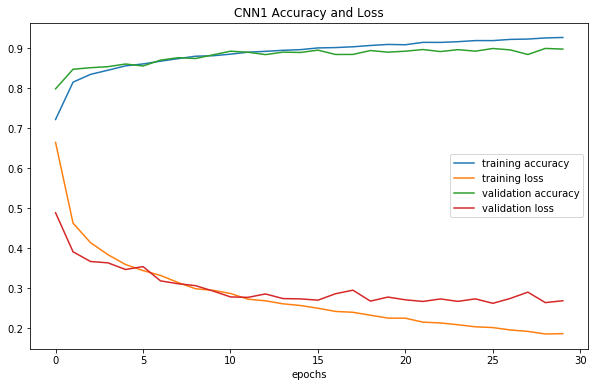

In [9]:
CNN1 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
CNN1.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
historyCNN1 = CNN1.fit(X_train, y_train, epochs = 30, batch_size=128, validation_data = (X_val, y_val))
acc_plot(historyCNN1.history, 'CNN1')
gen_csv(CNN1, 'CNN1')

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 8s 172us/sample - loss: 0.6666 - accuracy: 0.7388 - val_loss: 1.8230 - val_accuracy: 0.3392
Epoch 2/40
48000/48000 [==============================] - 6s 125us/sample - loss: 0.4660 - accuracy: 0.8127 - val_loss: 0.4788 - val_accuracy: 0.7974
Epoch 3/40
48000/48000 [==============================] - 6s 127us/sample - loss: 0.4217 - accuracy: 0.8318 - val_loss: 0.3686 - val_accuracy: 0.8469
Epoch 4/40
48000/48000 [==============================] - 6s 130us/sample - loss: 0.3874 - accuracy: 0.8443 - val_loss: 0.5260 - val_accuracy: 0.7865
Epoch 5/40
48000/48000 [==============================] - 6s 128us/sample - loss: 0.3701 - accuracy: 0.8522 - val_loss: 0.3577 - val_accuracy: 0.8512
Epoch 6/40
48000/48000 [==============================] - 6s 128us/sample - loss: 0.3474 - accuracy: 0.8614 - val_loss: 0.4980 - val_accuracy: 0.8003
Epoch 7/40
48000/48000 [==========================

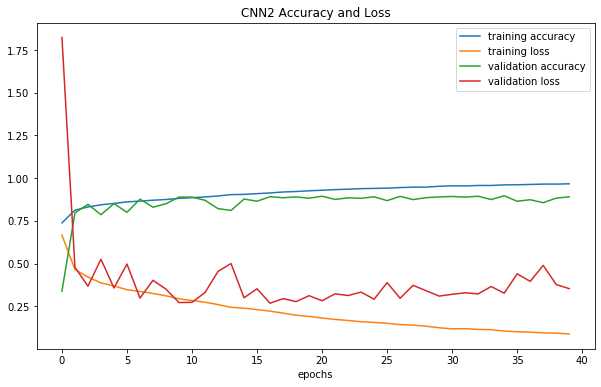

In [10]:
CNN2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
CNN2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
historyCNN2 = CNN2.fit(X_train, y_train, epochs = 40, batch_size=128, validation_data = (X_val, y_val))
acc_plot(historyCNN2.history, 'CNN2')
gen_csv(CNN2, 'CNN2')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 8, zoom_range = 0.1, shear_range = 0.3, width_shift_range=0.08, height_shift_range=0.08, vertical_flip=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history = model.fit(datagen.flow(X_train, y_train, batch_size = 128), epochs = 40, validation_data = (X_test, y_test), steps_per_epoch=X_train.shape[0] // 128, callbacks = [reduce_lr])
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

  ...
    to  
  ['...']
Train for 375 steps, validate on 12000 samples
Epoch 1/40
375/375 [==============================] - 23s 63ms/step - loss: 0.6649 - accuracy: 0.7512 - val_loss: 0.3261 - val_accuracy: 0.8732
Epoch 2/40
375/375 [==============================] - 21s 55ms/step - loss: 0.5207 - accuracy: 0.7897 - val_loss: 0.3525 - val_accuracy: 0.8547
Epoch 3/40
375/375 [==============================] - 22s 58ms/step - loss: 0.4928 - accuracy: 0.8031 - val_loss: 0.3338 - val_accuracy: 0.8637
Epoch 4/40
375/375 [==============================] - 20s 54ms/step - loss: 0.4783 - accuracy: 0.8084 - val_loss: 0.4013 - val_accuracy: 0.8298
Epoch 5/40
375/375 [==============================] - 21s 56ms/step - loss: 0.4631 - accuracy: 0.8143 - val_loss: 0.6324 - val_accuracy: 0.7389
Epoch 6/40
375/375 [==============================] - 21s 56ms/step - loss: 0.4547 - accuracy: 0.8170 - val_loss: 0.3197 - val_accuracy: 0.8668
Epoch 7/40
375/375 [==============================] - 21s 57ms/s

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 9s 197us/sample - loss: 0.7489 - accuracy: 0.7049 - val_loss: 2.6525 - val_accuracy: 0.2814
Epoch 2/50
48000/48000 [==============================] - 8s 172us/sample - loss: 0.5194 - accuracy: 0.7911 - val_loss: 0.6768 - val_accuracy: 0.7213
Epoch 3/50
48000/48000 [==============================] - 8s 169us/sample - loss: 0.4729 - accuracy: 0.8089 - val_loss: 0.4726 - val_accuracy: 0.8092
Epoch 4/50
48000/48000 [==============================] - 8s 168us/sample - loss: 0.4413 - accuracy: 0.8260 - val_loss: 0.5317 - val_accuracy: 0.7756
Epoch 5/50
48000/48000 [==============================] - 8s 168us/sample - loss: 0.4179 - accuracy: 0.8341 - val_loss: 0.7318 - val_accuracy: 0.7265
Epoch 6/50
48000/48000 [==============================] - 8s 168us/sample - loss: 0.4044 - accuracy: 0.8391 - val_loss: 0.3248 - val_accuracy: 0.8709
Epoch 7/50
48000/48000 [==========================

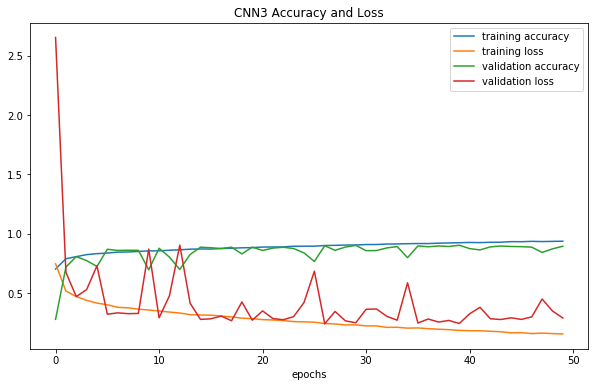

In [11]:
CNN3 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.5),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
CNN3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
historyCNN3 = CNN3.fit(X_train, y_train, epochs = 50, batch_size=128, validation_data = (X_val, y_val), callbacks = [reduce_lr])
acc_plot(historyCNN3.history, 'CNN3')
gen_csv(CNN3, 'CNN3')

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 119us/sample - loss: 0.8143 - accuracy: 0.6466 - val_loss: 0.5054 - val_accuracy: 0.7896
Epoch 2/50
48000/48000 [==============================] - 5s 100us/sample - loss: 0.5492 - accuracy: 0.7753 - val_loss: 0.4271 - val_accuracy: 0.8290
Epoch 3/50
48000/48000 [==============================] - 5s 100us/sample - loss: 0.4884 - accuracy: 0.8030 - val_loss: 0.4457 - val_accuracy: 0.8153
Epoch 4/50
48000/48000 [==============================] - 5s 99us/sample - loss: 0.4547 - accuracy: 0.8181 - val_loss: 0.3771 - val_accuracy: 0.8487
Epoch 5/50
48000/48000 [==============================] - 5s 101us/sample - loss: 0.4292 - accuracy: 0.8282 - val_loss: 0.3426 - val_accuracy: 0.8622
Epoch 6/50
48000/48000 [==============================] - 5s 101us/sample - loss: 0.4159 - accuracy: 0.8336 - val_loss: 0.3203 - val_accuracy: 0.8677
Epoch 7/50
48000/48000 [===========================

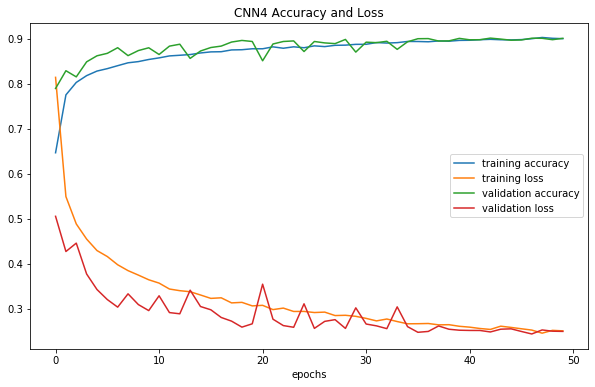

In [12]:
CNN4 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
CNN4.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
historyCNN4 = CNN4.fit(X_train, y_train, epochs = 50, batch_size=128, validation_data = (X_val, y_val), callbacks = [reduce_lr])
acc_plot(historyCNN4.history, 'CNN4')
gen_csv(CNN4, 'CNN4')

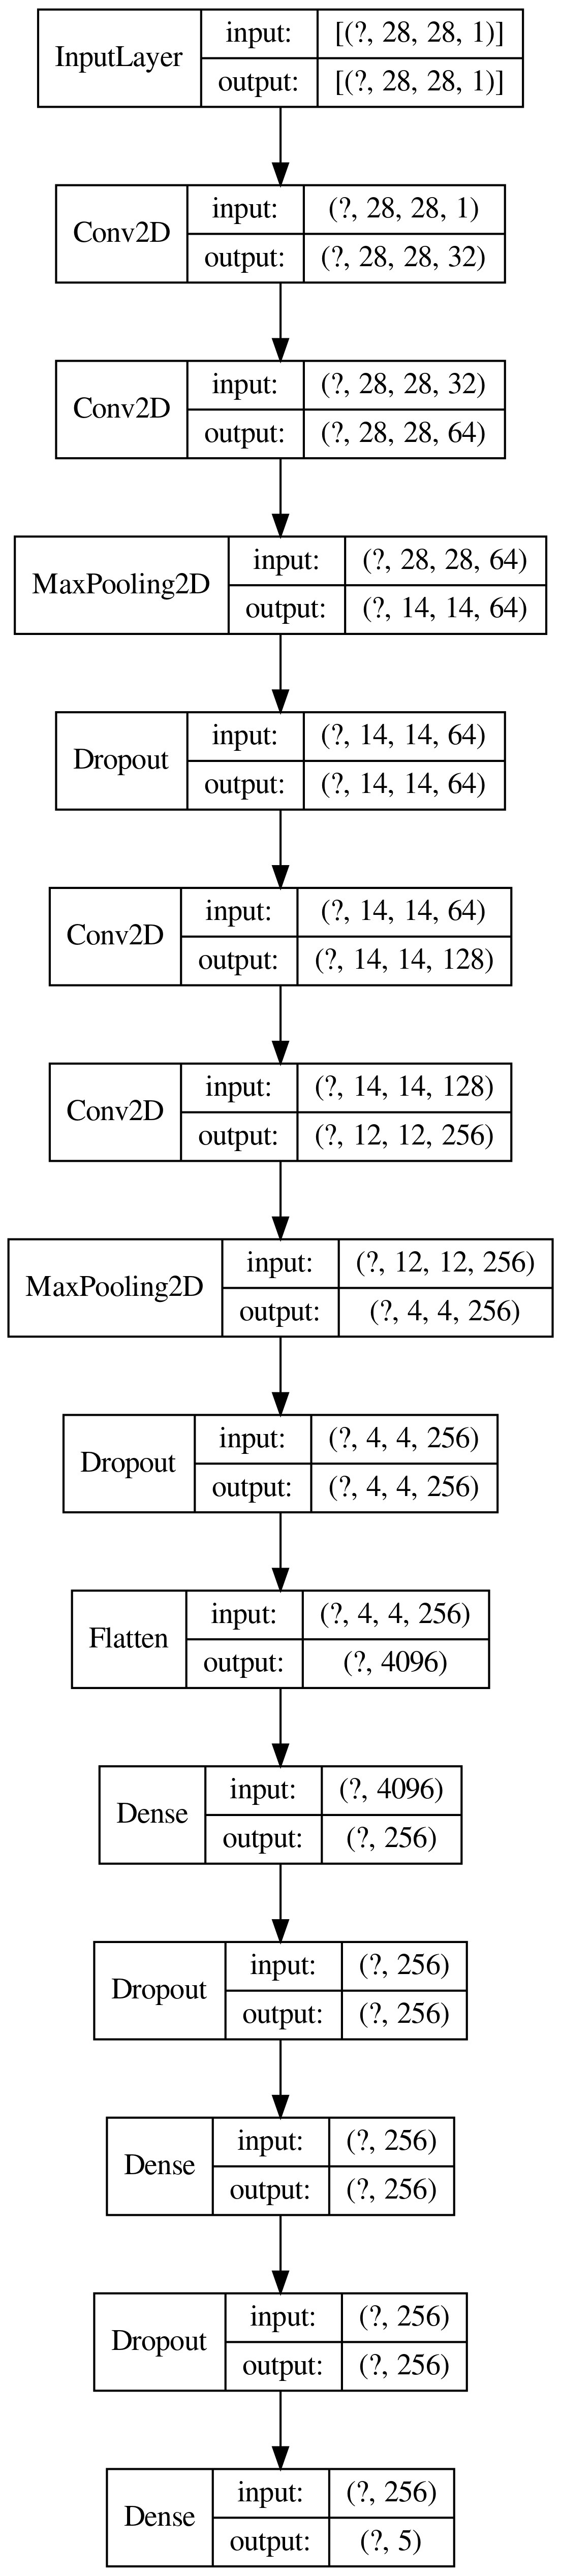

In [10]:
CNN4 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(3, 3)),
    Dropout(0.5),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
plot_model(model = CNN4, to_file='CNN4.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=300)